In [55]:
#Performing the standard imports  required

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import spacy
import re
from nltk.tokenize import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / I would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / I will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [3]:
train_df=pd.read_csv("train.csv")

In [4]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
train_df=train_df[['question_text','target']]

In [6]:
train_df

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0
...,...,...
1306117,What other technical skills do you need as a c...,0
1306118,Does MS in ECE have good job prospects in USA ...,0
1306119,Is foam insulation toxic?,0
1306120,How can one start a research project based on ...,0


In [7]:
train_df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [8]:
train_df.isnull().value_counts()

question_text  target
False          False     1306122
dtype: int64

In [9]:
train_df['question_text'].isnull().value_counts()

False    1306122
Name: question_text, dtype: int64

In [10]:
train_df['target'].isnull().value_counts()

False    1306122
Name: target, dtype: int64

In [11]:
colors = sns.color_palette('pastel')[0:2]

In [12]:
labels=['Sincere','insincere']

In [9]:
train_df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

###  There is no null values in the dataset

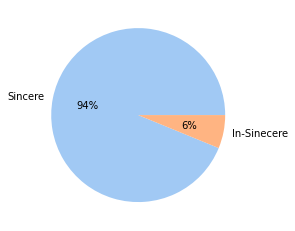

In [10]:
# train_df.target.groupby(train_df.question_text).sum().plot(kind='pie')
data = [1225312,80810]
labels = ['Sincere', 'In-Sinecere']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [13]:
##function to get verage word length
def average_word_length(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len+=len(word)
    return word_len/len(words)

In [14]:
def char_processing(x):
    char_dic = {}
    count=0
    for i in x:
        if ' ' == i:
            continue
        count += 1
    return count


In [15]:
train_df['word_counts']=train_df['question_text'].apply(lambda x:len(str(x).split()))

In [16]:
train_df['char_counts']=train_df['question_text'].apply(lambda x:char_processing(x))

In [17]:
train_df['average_wordLen']=train_df['question_text'].apply(lambda x:average_word_length(x))

In [18]:
train_df.head()

,question_text,target,word_counts,char_counts,average_wordLen
0,How did Quebec nationalists see their province...,0,13,60,4.615385
1,"Do you have an adopted dog, how would you enco...",0,16,66,4.125000
2,Why does velocity affect time? Does velocity a...,0,10,58,5.800000
3,How did Otto von Guericke used the Magdeburg h...,0,9,49,5.444444
4,Can I convert montra helicon D to a mountain b...,0,15,63,4.200000


In [19]:
labels=['Sincere','In-sincere']

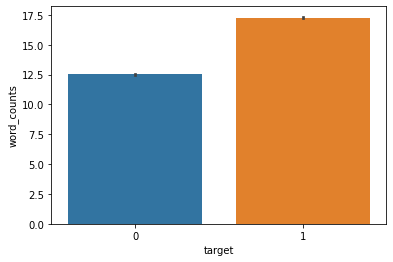

In [20]:
ax = sns.barplot(x="target", y="word_counts", data=train_df)


'Where can I throw a party in Lonavala?'

In [99]:
##Coverting the text in lower case 

In [21]:
train_df['question_text']=train_df['question_text'].apply(lambda x:x.lower())

In [110]:
## WE will check for contractions and replace it with proper words

In [22]:
def contration_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x
    
    

In [23]:
train_df['question_text']=train_df['question_text'].apply(lambda x:contration_to_exp(x))

In [120]:
# train_df['question_text'].head(50)

In [24]:
wordnet_lemmatizer = WordNetLemmatizer()

In [25]:
 def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemma_words=[wordnet_lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)


In [32]:
train_df['question_text']=train_df['question_text'].apply(lambda x:re.sub('[^A-Z a-z 0-9-]+','',x))
train_df['question_text']=train_df['question_text'].apply(lambda x:" ".join(x.split()))

In [65]:
train_df['question_text']=train_df['question_text'].apply(lambda x:" ".join(x.split()))

Remove accented characters

In [35]:
import unicodedata

In [33]:
def remove_accented_characters(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [57]:
lemmatizer = WordNetLemmatizer()  

In [50]:
stop_words = set(stopwords.words('english'))

In [36]:
train_df['question_text']=train_df['question_text'].apply(lambda x:remove_accented_characters(x))

In [48]:
train_df['question_text']=train_df['question_text'].apply(lambda x:" ".join([t for t in x.split() if t not in stop_words]))

In [58]:
def lemmatizeSentence(x):
    token_words=word_tokenize(x) 
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [61]:
train_df['question_text']=train_df['question_text'].apply(lambda x: lemmatizeSentence(x))

In [68]:
train_df['question_text'][4]

'convert montra helicon mountain bike changing tyre'

In [ ]:
train_df['question_text']=train_df['question_text'].apply(lambda x:" ".join(x.split()))

In [69]:
text=' '.join(train_df['question_text'])

In [71]:
text=text.split()

In [96]:
freq_comm=pd.Series(text).value_counts()

In [97]:
freq_comm

get             64757
would           63097
best            62318
people          56667
like            50563
                ...  
robina              1
dubois              1
pythagoreans        1
dateof              1
convex-hull         1
Length: 238589, dtype: int64

In [101]:
frequent_20=freq_comm[:20]

In [116]:
frequent_characters=list(frequent_20.keys())

In [123]:
frequent_characters.remove('good')


In [121]:
frequent_characters.remove('best')
frequent_characters.remove('like')

In [122]:
frequent_characters

['get',
 'would',
 'people',
 'one',
 'make',
 'india',
 'year',
 'way',
 'time',
 'think',
 'many',
 'life',
 'u',
 'much',
 'someone',
 'use',
 'want']

In [124]:
train_df['question_text']=train_df['question_text'].apply(lambda x:" ".join([t for t in x.split() if t not in frequent_characters]))

In [130]:
rare_20=freq_comm[-20:]

In [132]:
##Word Cloud Visulization 

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot  as plt
%matplotlib inline

In [135]:
x=' '.join(text[:20000])

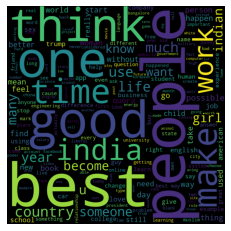

In [140]:
wc=WordCloud(width=1000,height=1000).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()